As suggested by Francois, I will look at the Gaia DR2 IERS sample with an extra criteria of $G \lt 18.3$.

In [1]:
from astropy.table import Table, Column
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
import bottleneck as bn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My module
from my_progs.catalog.read_gaia import read_dr2_iers

# from astropy.time import Time


In [2]:
# dr2_file = ("/Users/Neo/Astronomy/data/catalogs/"
#             "gaia/dr2/gaiadr2_iers.fits")
# gdr2 = Table.read(dr2_file)

gdr2 = read_dr2_iers()

In [3]:
print("For all {} quasar in the sample, the median formal error is".format(len(gdr2)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2["pos_err"])))

For all 2820 quasar in the sample, the median formal error is
    R.A.: 0.233 mas
    Decl: 0.211 mas
    EEMA: 0.264 mas


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


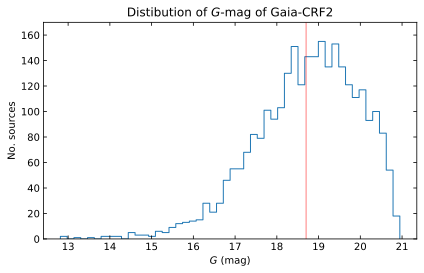

In [4]:
plt.hist(gdr2["phot_g_mean_mag"], 50, histtype="step")
plt.vlines(18.7, 0, 170, "r", lw=0.5)
plt.ylim([0, 170])
plt.xlabel("$G$ (mag)")
plt.ylabel("No. sources")
plt.title("Distibution of $G$-mag of Gaia-CRF2")

# plt.xaxis.set_ticks_position("both")
# plt.yaxis.set_ticks_position("both")

plt.tight_layout()
plt.savefig("../plots/gcrf2-G-dist.eps", hbox="tight")

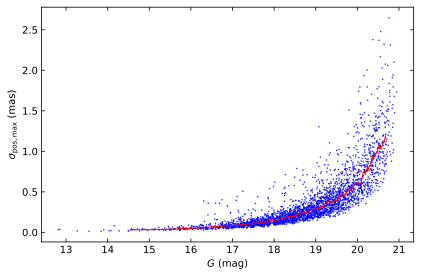

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(gdr2["phot_g_mean_mag"], gdr2["pos_err"], "b.", ms=1)

# Moving median
gdr2.sort("phot_g_mean_mag")
inter_size = 100
med_g = bn.move_median(gdr2["phot_g_mean_mag"], inter_size, min_count=25)
med_sigma = bn.move_median(gdr2["pos_err"], inter_size, min_count=25)
ax.plot(med_g, med_sigma, "r", lw=1)

ax.set_xlabel("$G$ (mag)")
ax.set_ylabel("$\\sigma_{\\rm pos,max}$ (mas)")
# ax.set_ylim([-0.1, 3])
# ax.vlines(18.7, -0.1, 3, "r", lw=0.5)

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

# ax.grid(lw=0.1)

plt.tight_layout()
plt.savefig("../plots/gdr2-sigma-vs-G.eps", hbox="tight")

In [6]:
mask = (gdr2["phot_g_mean_mag"] < 18.7)
gdr2bgt = gdr2[mask]
gdr2bgt.filled()

mask = (gdr2["phot_g_mean_mag"] >= 18.7)
gdr2drk = gdr2[mask]
gdr2drk.filled()

print("For {} quasar with G < 18.7, the median formal error is".format(len(gdr2bgt)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2bgt["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2bgt["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2bgt["pos_err"])))

print("For {} quasar with G >= 18.7, the median formal error is".format(len(gdr2drk)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2drk["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2drk["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2drk["pos_err"])))

For 1288 quasar with G < 18.7, the median formal error is
    R.A.: 0.120 mas
    Decl: 0.109 mas
    EEMA: 0.136 mas
For 1532 quasar with G >= 18.7, the median formal error is
    R.A.: 0.408 mas
    Decl: 0.361 mas
    EEMA: 0.456 mas


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


There are 1288 quasars with $G \lt 18.7$.

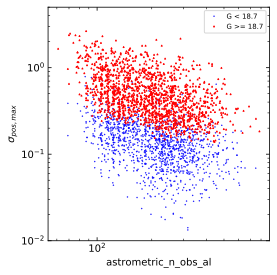

In [7]:
fig, ax0 = plt.subplots(figsize=(4, 4))

# Bright quasars
# eema vs NO. obs
ax0.plot(gdr2bgt["astrometric_n_obs_al"], gdr2bgt["pos_err"], "b.", ms=1, label="G < 18.7")
ax0.plot(gdr2drk["astrometric_n_obs_al"], gdr2drk["pos_err"], "r^", ms=1, label="G >= 18.7")

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_xlabel("astrometric_n_obs_al")
ax0.set_ylabel("$\\sigma_{pos,max}$")
ax0.set_ylim([0.01, 5])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")
ax0.legend(fontsize="x-small")

plt.tight_layout()

In [8]:
mask = (gdr2["dec"] < 0)
gdr2sou = gdr2[mask]
gdr2sou.filled()

mask = (gdr2["dec"] >= 0)
gdr2nor = gdr2[mask]
gdr2nor.filled()

print("For {} quasar in the south, the median formal error is".format(len(gdr2sou)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2sou["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2sou["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2sou["pos_err"])))

print("For {} quasar in the north, the median formal error is".format(len(gdr2nor)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2nor["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2nor["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2nor["pos_err"])))

For 1197 quasar in the south, the median formal error is
    R.A.: 0.243 mas
    Decl: 0.221 mas
    EEMA: 0.276 mas
For 1623 quasar in the north, the median formal error is
    R.A.: 0.225 mas
    Decl: 0.202 mas
    EEMA: 0.250 mas


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


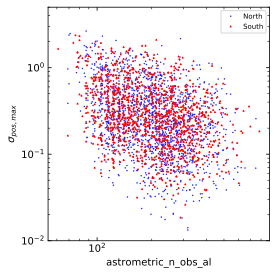

In [9]:
fig, ax0 = plt.subplots(figsize=(4, 4))

# eema vs NO. obs
# quasars in the north
ax0.plot(gdr2nor["astrometric_n_obs_al"], gdr2nor["pos_err"], "b.", ms=1, label="North")
ax0.plot(gdr2sou["astrometric_n_obs_al"], gdr2sou["pos_err"], "r^", ms=1, label="South")

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_xlabel("astrometric_n_obs_al")
ax0.set_ylabel("$\\sigma_{pos,max}$")
ax0.set_ylim([0.01, 5])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")
ax0.legend(fontsize="x-small")

plt.tight_layout()
plt.savefig("../plots/gdr2-sigma-vs-nobs-sth-nth.eps", hbox="tight")

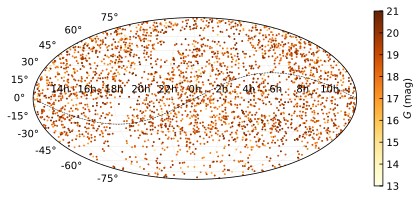

In [10]:
# Distribution of formal errors of Gaia position.
gdr2.sort("phot_g_mean_mag")
rag = Angle(gdr2["ra"]).wrap_at(180*u.degree)
decg = Angle(gdr2["dec"])

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection="mollweide")

# Add the ecliptic plane
elon = np.arange(0, 361, 5)
elat = np.zeros_like(elon)
ecl = SkyCoord(lon=elon*u.degree, lat=elat*u.degree, frame="barycentricmeanecliptic")
ra0 = ecl.icrs.ra.wrap_at(180*u.degree).radian
dec0 = ecl.icrs.dec.radian
ra1 = np.sort(ra0)
index = np.argsort(ra0)
dec1 = np.take(dec0, index)

ax.plot(ra1, dec1, "k--", lw=0.5)

sc = ax.scatter(rag.radian, decg.radian, c=gdr2["phot_g_mean_mag"],
                s=1, vmin=13, vmax=21, cmap="YlOrBr")
                
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h", "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, label="$G$ (mag)", fraction=0.025)
ax.grid(True)

plt.tight_layout()
plt.savefig("../plots/gdr2-G-sky-dist.eps", hbox="tight")